In [36]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)

warnings.filterwarnings('ignore')


In [37]:
seed = 42
np.random.seed(seed)

### Quick overview of logistic regresion


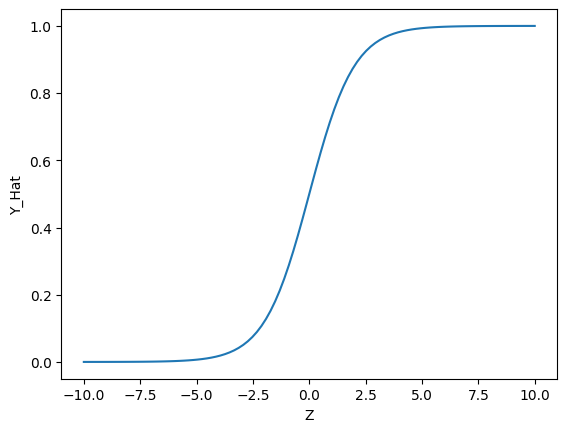

In [38]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

X_linspace = np.linspace(-10,10,100)
Y_hat = sigmoid(X_linspace)

plt.plot(X_linspace,Y_hat)
plt.xlabel('Z')
plt.ylabel('Y_Hat')
plt.show()

### 1. Loading Data

In [39]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Model Training

In [40]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000
)

model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 3. Inference

In [41]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

In [42]:
pd.Series(Y_test).value_counts()

0    1623
1     376
Name: count, dtype: int64

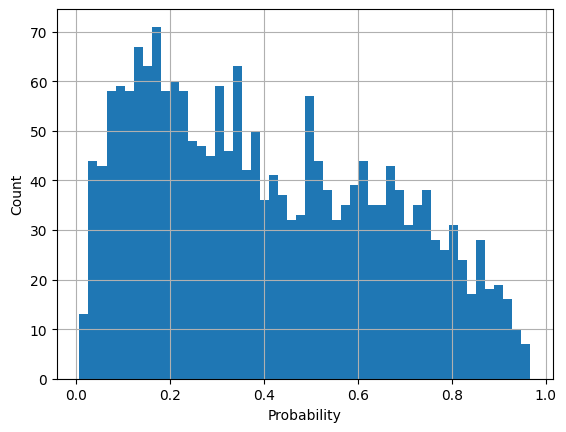

In [43]:
Y_lr_test = Y_proba_test[:,1]

plt.hist(Y_lr_test, bins =50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid()
plt.show()

### 4. Evaluation

In [44]:
Y_hat_test = Y_lr_test > 0.8
Y_hat_test

array([False, False, False, ..., False, False,  True])

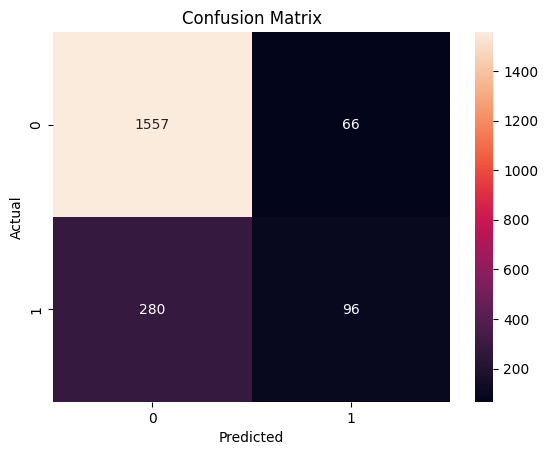

In [45]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()